In [141]:
import pandas as pd

file_path = '/home/ramma/assessment-solution-april/data/palm_ffb.csv'
df = pd.read_csv(file_path, delimiter=',', parse_dates=['Date'], dayfirst=True)
df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,2008-01-01,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,2008-02-01,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,2008-03-01,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,2008-04-01,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,2008-05-01,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [142]:
import pandas as pd

def preprocess_dataframe(df, column):
    """
    Preprocess the input DataFrame by performing the following steps:
    1. Check for missing values.
    2. Convert 'Date' column to datetime format.
    3. Convert 'Working_days' column to float.
    4. Drop duplicate rows.
    5. Drop rows with any missing values.
    6. Identify and remove outliers in a specified column.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame to preprocess.
    column (str): The column name to identify and remove outliers.
    
    Returns:
    pd.DataFrame: The preprocessed DataFrame.
    """
    # Check for missing values before preprocessing
    print("Missing values before preprocessing:")
    print(df.isna().sum())

    # Convert 'Date' column to datetime format
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
    
    # Convert 'Working_days' column to float
    if 'Working_days' in df.columns:
        df['Working_days'] = df['Working_days'].astype(float)
    
    # Drop duplicate rows
    df.drop_duplicates(inplace=True)
    
    # Drop rows with any missing values
    df.dropna(inplace=True)
    
    # Check for missing values after preprocessing
    print("Missing values after preprocessing:")
    print(df.isna().sum())
    
    # Identify and remove outliers in the specified column
    if column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # Identify outliers
        outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
        print(f"Number of outliers identified in {column}: {len(outliers)}")
        
        # Remove outliers
        df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    
    return df

# Assuming df is the DataFrame to be processed
columns_to_check = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
for column in columns_to_check:
    df = preprocess_dataframe(df, column)

df.head()

Missing values before preprocessing:
Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64
Missing values after preprocessing:
Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64
Number of outliers identified in SoilMoisture: 0
Missing values before preprocessing:
Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64
Missing values after preprocessing:
Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64
Number of outliers identified in Average_Temp: 3
Missing values befor

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,2008-01-01,616.4,25.306452,21.3,32.2,184.4,25.0,777778.3951,1.62
1,2008-02-01,568.9,26.165517,20.9,35.1,140.2,23.0,767988.2759,1.45
2,2008-03-01,577.6,25.448387,21.3,32.9,280.4,25.0,783951.9231,1.56
3,2008-04-01,581.1,26.903333,20.6,34.8,173.3,25.0,788987.0504,1.39
4,2008-05-01,545.4,27.241935,20.9,35.0,140.6,25.0,813659.7222,1.44


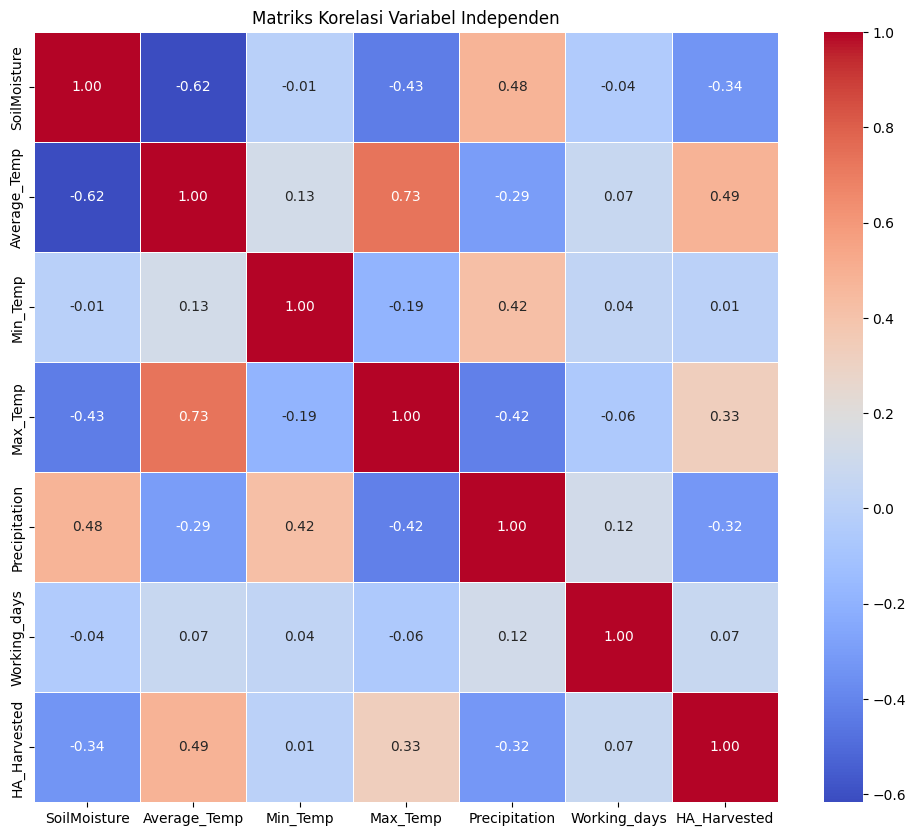

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
X = df[['SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation', 'Working_days', 'HA_Harvested']]

# Hitung matriks korelasi
corr_matrix = X.corr()

# Visualisasikan matriks korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Variabel Independen')
plt.show()


In [144]:
import numpy as np
threshold = 0.9
high_corr_var = np.where(np.abs(corr_matrix) > threshold)

# Menyaring fitur yang berkorelasi tinggi
high_corr_pairs = [(corr_matrix.columns[x], corr_matrix.columns[y]) 
                   for x, y in zip(*high_corr_var) 
                   if x != y and x < y]

print("Pasangan fitur yang berkorelasi tinggi:")
for pair in high_corr_pairs:
    print(pair, "-> Korelasi:", corr_matrix.loc[pair[0], pair[1]])

# Pilih fitur untuk dihapus
features_to_remove = set([pair[1] for pair in high_corr_pairs])

# Hapus fitur yang dipilih dari DataFrame
X_reduced = X.drop(columns=features_to_remove)

print("Fitur yang dihapus:", features_to_remove)

Pasangan fitur yang berkorelasi tinggi:
Fitur yang dihapus: set()


In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_with_const = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
vif_data

,Variable,VIF
0,const,5979.543508
1,SoilMoisture,2.000209
2,Average_Temp,3.906257
3,Min_Temp,1.497310
4,Max_Temp,2.810054
5,Precipitation,1.908572
6,Working_days,1.056994
7,HA_Harvested,1.408389


In [146]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Model Regresi Linear Berganda
X = df[['SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp','Precipitation', 'Working_days', 'HA_Harvested']]
y = df['FFB_Yield']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menambahkan konstanta (intercept) untuk model regresi dengan statsmodels
X_scaled = sm.add_constant(X_scaled)

# Membuat model regresi linear
model = sm.OLS(y, X_scaled).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              FFB_Yield   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     8.181
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           4.71e-08
Time:                        11:08:43   Log-Likelihood:                 7.0630
No. Observations:                 122   AIC:                             1.874
Df Residuals:                     114   BIC:                             24.31
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6150      0.021     75.510      0.0

In [ ]:
# 1. Persiapan Data
def preprocess_dataframe(df, column):
    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True)
    # Identifikasi dan hapus outlier
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df

# Assuming df is the DataFrame to be processed
columns_to_check = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
for column in columns_to_check:
    df = preprocess_dataframe(df, column)

df.head()

Missing values before preprocessing:
Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64
Missing values after preprocessing:
Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64
Number of outliers identified in SoilMoisture: 0
Missing values before preprocessing:
Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64
Missing values after preprocessing:
Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64
Number of outliers identified in Average_Temp: 0
Missing values befor

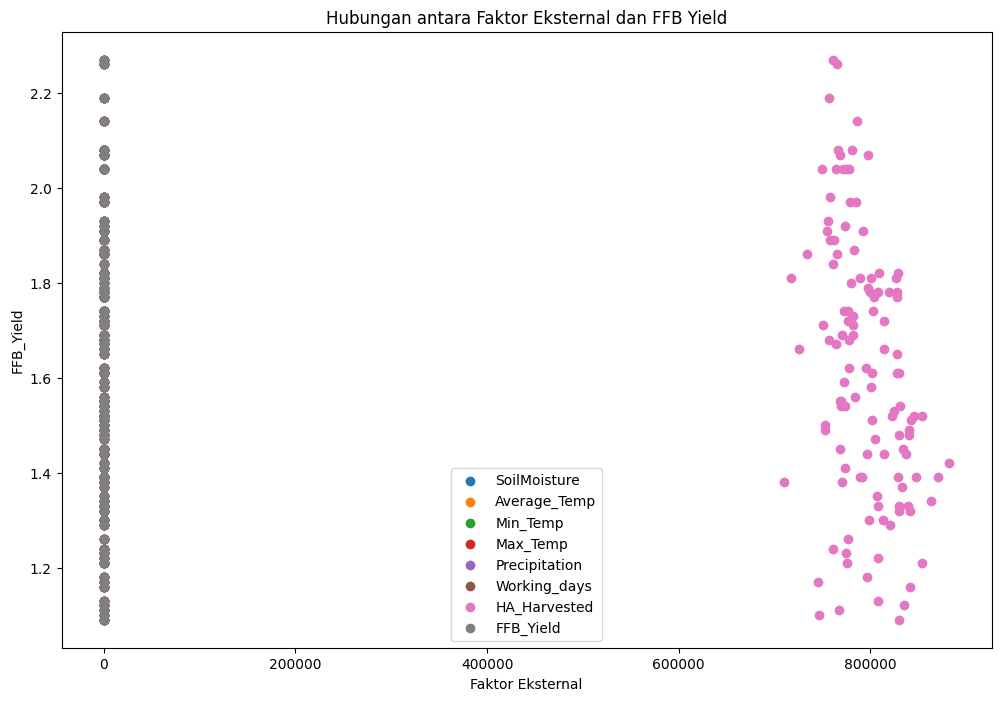

In [56]:
import pandas as pd

def preprocess_dataframe(df, column):
    """
    Preprocess the input DataFrame by performing the following steps:
    1. Check for missing values.
    2. Convert 'Date' column to datetime format.
    3. Convert 'Working_days' column to float.
    4. Drop duplicate rows.
    5. Drop rows with any missing values.
    6. Identify and remove outliers in a specified column.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame to preprocess.
    column (str): The column name to identify and remove outliers.
    
    Returns:
    pd.DataFrame: The preprocessed DataFrame.
    """
    # Check for missing values before preprocessing
    print("Missing values before preprocessing:")
    print(df.isna().sum())

    # Convert 'Date' column to datetime format
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
    
    # Convert 'Working_days' column to float
    if 'Working_days' in df.columns:
        df['Working_days'] = df['Working_days'].astype(float)
    
    # Drop duplicate rows
    df.drop_duplicates(inplace=True)
    
    # Drop rows with any missing values
    df.dropna(inplace=True)
    
    # Check for missing values after preprocessing
    print("Missing values after preprocessing:")
    print(df.isna().sum())
    
    # Identify and remove outliers in the specified column
    if column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # Identify outliers
        outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
        print(f"Number of outliers identified in {column}: {len(outliers)}")
        
        # Remove outliers
        df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    
    return df

# Assuming df is the DataFrame to be processed
columns_to_check = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
for column in columns_to_check:
    df = preprocess_dataframe(df, column)

df.head()





In [61]:
import statsmodels.api as sm
X = df[['SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation', 'Working_days', 'HA_Harvested']]
y = df['FFB_Yield']


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              FFB_Yield   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     8.181
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           4.71e-08
Time:                        09:23:18   Log-Likelihood:                 7.0630
No. Observations:                 122   AIC:                             1.874
Df Residuals:                     114   BIC:                             24.31
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.4759      1.654      2.706

In [ ]:
import pandas as pd

def get_outliers(df, column):
    """
    Mengidentifikasi outliers dalam kolom tertentu pada DataFrame.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    return outliers

def remove_outliers(df, column):
    """
    Menghapus outliers dalam kolom tertentu pada DataFrame.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

# Menampilkan outliers sebelum penyaringan
print("Outliers Sebelum Penyaringan:")
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Hanya untuk kolom numerik
        outliers = get_outliers(df, column)
        if not outliers.empty:
            print(f"\nKolom: {column}")
            print(outliers)

# Menyaring outliers untuk beberapa kolom
columns_to_check = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
for column in columns_to_check:
    df = remove_outliers(df, column)

# Menampilkan data setelah penyaringan
print("\nData Setelah Menyaring Outliers:")
df.head()
